# image Processing HW1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

Q2 - Part 1

In [3]:
def calc_hist(image):
  '''
  calculate image histogram
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    hist (ndarray): computed input image histogram
  '''
  hist = np.zeros(256,dtype=int)

  ############
  # Your code
  # Start
  unique, counts = np.unique(image, return_counts=True)
  pxlCount = dict(zip(unique, counts))
  for pxl in range(256):
    if pxl in pxlCount.keys():
      hist[pxl] = pxlCount[pxl]
    else:
      hist[pxl] = 0
  # End
  return hist


**compute histogram with opencv**

In [4]:
############
# Your code
# Start
img_path = '/content/drive/MyDrive/Digital Image Processing/HW1/img1.jpg'
img = cv2.imread(img_path ,cv2.IMREAD_GRAYSCALE)
cv_hist = cv2.calcHist([img],[0],None,[256],[0,256])
# End

test **(don't change next cell)**

Text(0.5, 1.0, 'Opencv histogram')

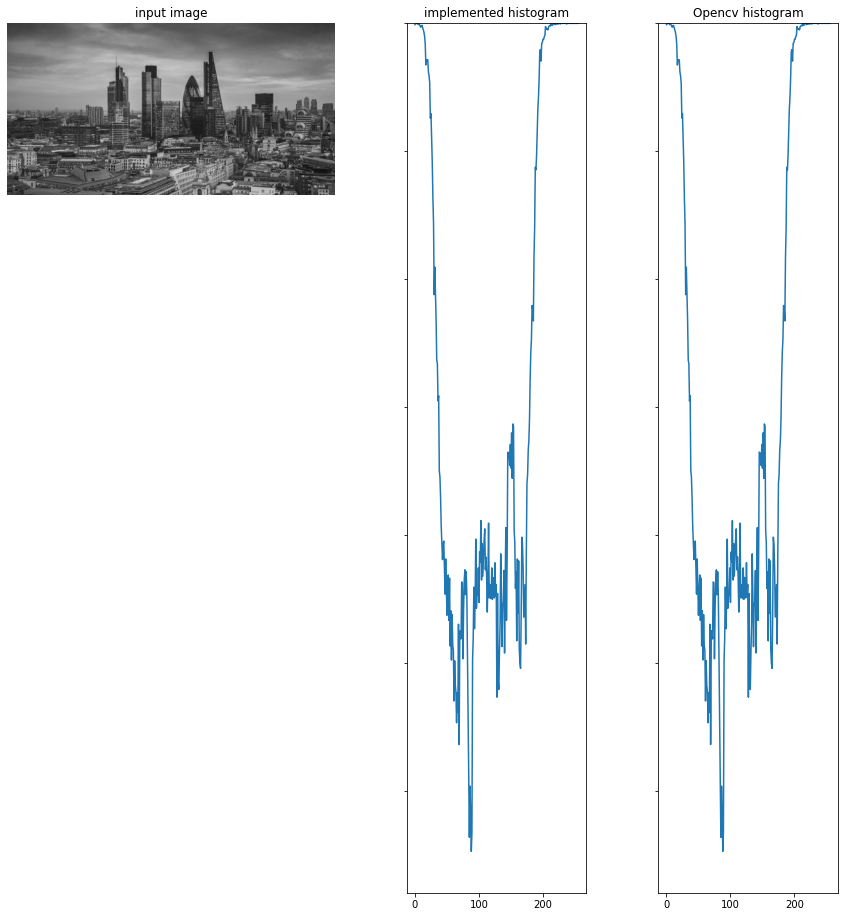

In [5]:
img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(16,16))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(1, 3), 
                 axes_pad=1,  
                 )


grid[0].imshow(img,cmap='gray',vmin=0,vmax=255)
grid[0].set_title('input image')
grid[0].axis('off')
grid[1].plot(calc_hist(img))
grid[1].set_title('implemented histogram')
grid[2].plot(cv_hist)
grid[2].set_title('Opencv histogram')





Q2 - Part 2

In [6]:
def stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
  '''
  output_image = image.copy()
  ############
  # Your code
  # Start
  # unique, counts = np.unique(output_image, return_counts=True)
  # pxlCount = dict(zip(unique, counts))
  # print(pxlCount)
  f = np.unique(output_image, return_counts=False)
  
  # f = list(pxlCount.keys())
  fmin = f[0]
  fmax = f[-1]
  # print(fmin, fmax)
  output_image = ((output_image - fmin) / (fmax - fmin)) * 255 
  # End
  # print(output_image.shape)
  return output_image
  

In [7]:
img_path = '/content/drive/MyDrive/Digital Image Processing/HW1/img2.jpg'
# img = cv2.imread(img_path ,cv2.IMREAD_GRAYSCALE)
# stretch_hist(img)

test **(don't change next cell)**

Text(0.5, 1.0, 'enhanced histogram')

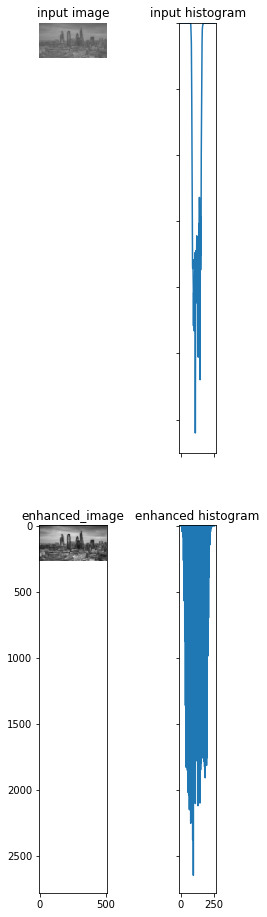

In [8]:
img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(16,16))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(2, 2), 
                 axes_pad=1,  
                 )


grid[0].imshow(img,cmap='gray',vmin=0,vmax=255)
grid[0].set_title('input image')
grid[0].axis('off')
grid[1].plot(calc_hist(img))
grid[1].set_title('input histogram')
enhanced_image = stretch_hist(img)
grid[2].imshow(enhanced_image,cmap='gray',vmin=0,vmax=255)
grid[2].set_title('enhanced_image')
grid[3].plot(calc_hist(enhanced_image))
grid[3].set_title('enhanced histogram')

Q2-Part3

In [9]:
img_path = '/content/drive/MyDrive/Digital Image Processing/HW1/img4.jpg'
# img = cv2.imread(img_path ,cv2.IMREAD_GRAYSCALE)
# stretch_hist(img)

Text(0.5, 1.0, 'enhanced histogram')

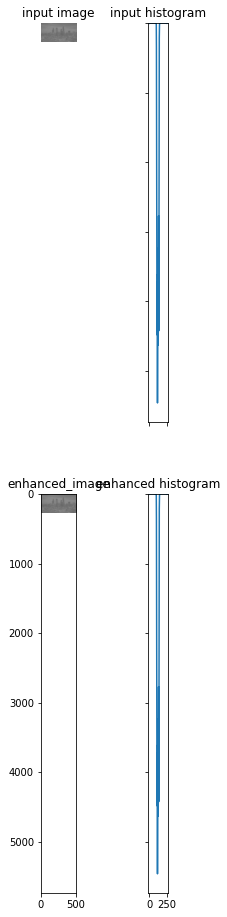

In [10]:
img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(16,16))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(2, 2), 
                 axes_pad=1,  
                 )


grid[0].imshow(img,cmap='gray',vmin=0,vmax=255)
grid[0].set_title('input image')
grid[0].axis('off')
grid[1].plot(calc_hist(img))
grid[1].set_title('input histogram')
enhanced_image = stretch_hist(img)
grid[2].imshow(enhanced_image,cmap='gray',vmin=0,vmax=255)
grid[2].set_title('enhanced_image')
grid[3].plot(calc_hist(enhanced_image))
grid[3].set_title('enhanced histogram')

In [11]:
def modified_stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with modified histogram stretching
  '''
  output_image = image.copy()
  ############
  # Your code
  # Start
  # unique, counts = np.unique(output_image, return_counts=True)
  # f = np.unique(output_image, return_counts=False)
  hist = calc_hist(output_image)
  # pxlCount = dict(zip(unique, counts))
  # print(hist.shape)
  shape = output_image.shape
  size = shape[0] * shape[1]
  one_prcnt_count = int(size * 0.01)
  # print(hist)
  # print(one_prcnt_count)
  sum_1 = 0
  # f1 = 0
  for i in range(len(hist)):  
    sum_1 = sum_1 + hist[i] 
    if sum_1 >= one_prcnt_count:  
        f1 = i 
        break
  sum_99 = 0
  for i in range(len(hist)-1, -1, -1):  
    sum_99 = sum_99 + hist[i] 
    
    if sum_99 >= one_prcnt_count:  
        f99 = i
        break
  # print(f1,f99)

  output_image = np.minimum(np.maximum(((output_image - f1) / (f99 - f1)) * 255, 0), 255)
  # End
  ############
  return output_image
  

In [12]:
img_path = '/content/drive/MyDrive/Digital Image Processing/HW1/img4.jpg'
# img = cv2.imread(img_path ,cv2.IMREAD_GRAYSCALE)
# modified_stretch_hist(img)

test **(don't change next cell)**

Text(0.5, 1.0, 'enhanced histogram')

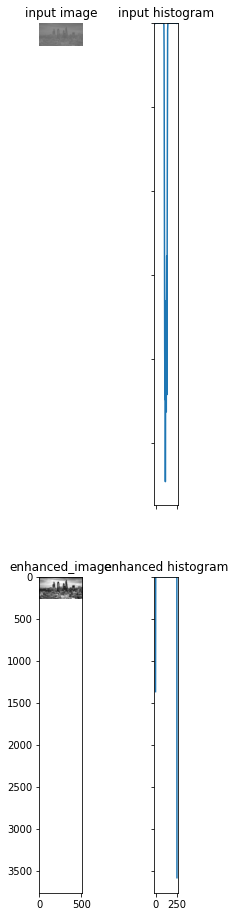

In [13]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(16,16))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(2, 2), 
                 axes_pad=1,  
                 )


grid[0].imshow(img,cmap='gray',vmin=0,vmax=255)
grid[0].set_title('input image')
grid[0].axis('off')
grid[1].plot(calc_hist(img))
grid[1].set_title('input histogram')
enhanced_image = modified_stretch_hist(img)
grid[2].imshow(enhanced_image,cmap='gray',vmin=0,vmax=255)
grid[2].set_title('enhanced_image')
grid[3].plot(calc_hist(enhanced_image))
grid[3].set_title('enhanced histogram')

Q2-Part 4

In [14]:
def equalize_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram equalization
  '''
  output_image = image.copy()
  ############
  # Your code
  # Start
  # print(output_image)
  hist = calc_hist(output_image)
  L, W = output_image.shape
  n = L * W
  cumsum = np.cumsum(hist)
  # print(hist.shape)
  # print(cumsum.shape)
  s = ((255./n) * cumsum).astype(int)
  
  # print(s)
  for i in range(L):
    for j in range(W):
      output_image[i,j] = s[output_image[i,j]]

  # End
  return output_image


In [15]:
img1_path = '/content/drive/MyDrive/Digital Image Processing/HW1/img2.jpg'
img2_path = '/content/drive/MyDrive/Digital Image Processing/HW1/img3.jpg'
img3_path = '/content/drive/MyDrive/Digital Image Processing/HW1/img4.jpg'
# img3 = cv2.imread(img3_path,cv2.IMREAD_GRAYSCALE)
# equalize_hist(img3)

test **(don't change next cell)**

Text(0.5, 1.0, 'histogram')

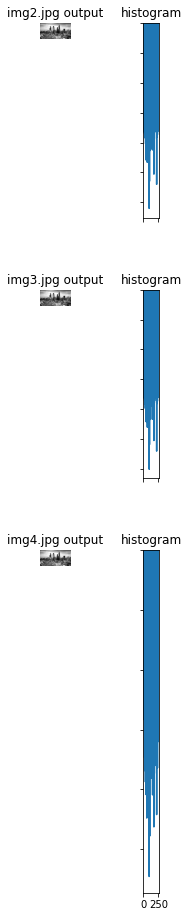

In [16]:
img1 = cv2.imread(img1_path,cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path,cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread(img3_path,cv2.IMREAD_GRAYSCALE)

fig = plt.figure(figsize=(16,16))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(3, 2), 
                 axes_pad=1,  
                 )


eq_img1 = equalize_hist(img1)
grid[0].imshow(eq_img1,cmap='gray',vmin=0,vmax=255)
grid[0].set_title('img2.jpg output')
grid[0].axis('off')
grid[1].plot(calc_hist(eq_img1))
grid[1].set_title('histogram')
eq_img2 = equalize_hist(img2)
grid[2].imshow(eq_img2,cmap='gray',vmin=0,vmax=255)
grid[2].set_title('img3.jpg output')
grid[2].axis('off')
grid[3].plot(calc_hist(eq_img2))
grid[3].set_title('histogram')
eq_img3 = equalize_hist(img3)
grid[4].imshow(eq_img3,cmap='gray',vmin=0,vmax=255)
grid[4].set_title('img4.jpg output')
grid[4].axis('off')
grid[5].plot(calc_hist(eq_img3))
grid[5].set_title('histogram')

Q3

In [17]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [18]:
def hist_matching(src_image,ref_image):
  '''
  don't use libraries
  input(s):
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output(s):
    output_image (ndarray): transformation of source image so that its histogram matches histogram of refrence image 
  '''
  output_image = src_image.copy()
  ############
  # Your code
  # Start
  
  # print(output_image[:,: ,1].shape)
  L_src, W_src, C_src = output_image.shape
  n_src = L_src * W_src
  hist_src = np.asarray([calc_hist(output_image[:,: ,0]), calc_hist(output_image[:,: ,1]), calc_hist(output_image[:,: ,2])])
  # print(hist_src.shape)
  

  cumsum_src = np.asarray([np.cumsum(hist_src[0]), np.cumsum(hist_src[1]), np.cumsum(hist_src[2])])
  s_src = ((255./n_src) * cumsum_src).astype(int)
  # print(s_src.shape)

  L_ref, W_ref, C_ref = ref_image.shape
  n_ref = L_ref * W_ref
  hist_ref = np.asarray([calc_hist(ref_image[:,: ,0]), calc_hist(ref_image[:,: ,1]), calc_hist(ref_image[:,: ,2])])
  
  cumsum_ref = np.asarray([np.cumsum(hist_ref[0]), np.cumsum(hist_ref[1]), np.cumsum(hist_ref[2])])
  s_ref = ((255./n_ref) * cumsum_ref).astype(int)
  # print(s_ref.shape)
  # print(s_src)
  # print(s_ref)
  s_src_new = np.zeros(s_src.shape)
  for c in range(3):
    for p in range(256):
      # print(c,p, s_src[c,p])
      s_src_new[c,p] = find_nearest(s_ref[c], s_src[c,p])

  s_src_new = s_src_new.astype(int)
  # print(s_src_new[0])
  for i in range(L_src):
    for j in range(W_src):
      for c in range(C_src):
        output_image[i,j,c] = s_src_new[c, output_image[i,j,c]]
  # End
  # print(output_image.shape)
  return output_image

In [19]:
src_path = '/content/drive/MyDrive/Digital Image Processing/HW1/src.jpg'
ref_path = '/content/drive/MyDrive/Digital Image Processing/HW1/ref.jpg'
# src = cv2.imread(src_path)
# ref = cv2.imread(ref_path)
# hist_matching(src, ref)

test **(don't change next cell)**

(-0.5, 1199.5, 799.5, -0.5)

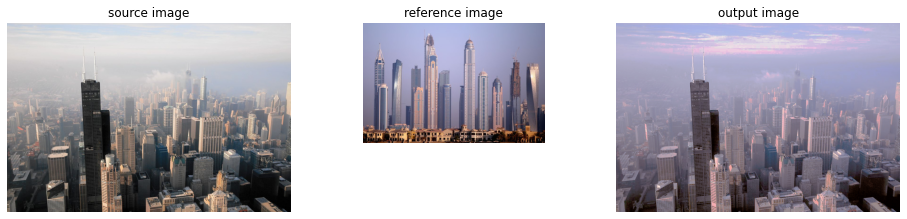

In [20]:
src = cv2.imread(src_path)
ref = cv2.imread(ref_path)
fig = plt.figure(figsize=(16,16))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(1, 3), 
                 axes_pad=1,  
                 )


grid[0].imshow(src[:,:,::-1])
grid[0].set_title('source image')
grid[0].axis('off')
grid[1].imshow(ref[:,:,::-1])
grid[1].set_title('reference image')
grid[1].axis('off')
grid[2].imshow(hist_matching(src,ref)[:,:,::-1])
grid[2].set_title('output image')
grid[2].axis('off')